# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html

soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')  
data_rows = []

# Loop through each row in the table
for row in table.find_all('tr'):
    # Extract the data from each cell in the row
    cells = row.find_all('td') 
    row_data = [cell.get_text(strip=True) for cell in cells]  
    
    # Only add rows that have data (to avoid empty rows)
    if row_data:
        data_rows.append(row_data)

# Print the extracted rows of data
print(data_rows)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row_data in data_rows:  
    row = {
        'id': row_data[0],
        'terrestrial_date': row_data[1],
        'sol': row_data[2],
        'ls': row_data[3],
        'month': row_data[4],
        'min_temp': row_data[5],
        'pressure': row_data[6]
    }
    
    # Append the row to the data list
    data.append(row)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_weather_df = pd.DataFrame(data, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis

# Convert 'terrestrial_date' to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' to int
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to float
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
unique_months = mars_weather_df['month'].nunique()
print(unique_months)

12


In [13]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_weather_df['sol'].nunique()
print(total_sols)

1867


In [14]:
# 3. What is the average minimum temperature by month?
average_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
print(average_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


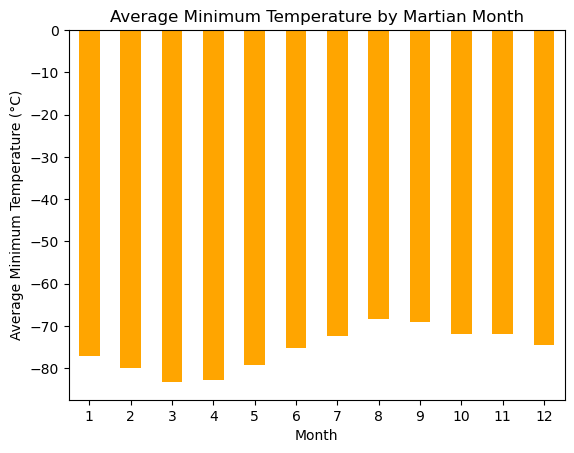

In [15]:
# Plot the average minimum temperature by month
average_min_temp.plot(kind='bar', color='orange')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

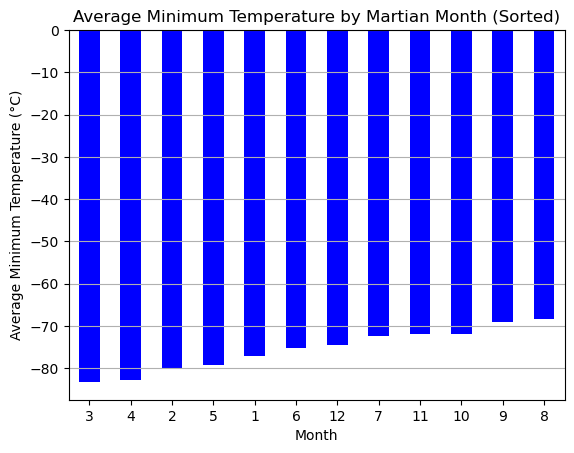

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
average_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Sort the average minimum temperature
sorted_avg_min_temp = average_min_temp.sort_values()

# Plot the sorted average minimum temperatures as a bar graph
sorted_avg_min_temp.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Martian Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [17]:
# 4. What is the average pressure by month?
average_pressure = mars_weather_df.groupby('month')['pressure'].mean()
print(average_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


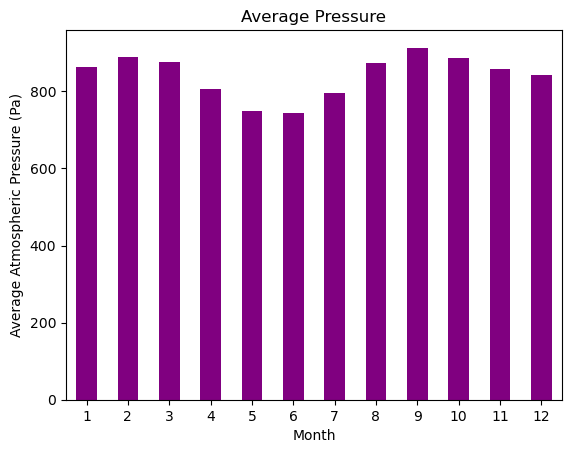

In [18]:
# Plot the average pressure by month
average_pressure.plot(kind='bar', color='purple')
plt.title('Average Pressure')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.show()

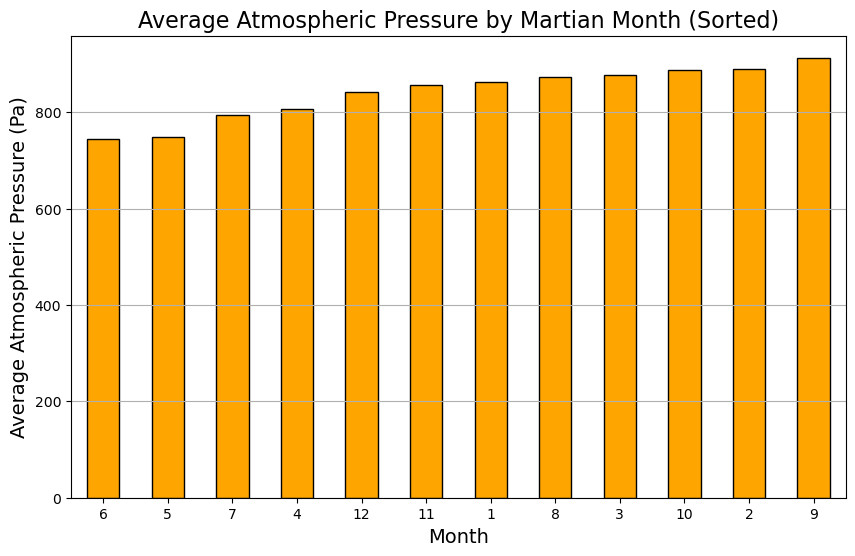

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = average_pressure.sort_values()

# Create a bar chart for the sorted average atmospheric pressure
plt.figure(figsize=(10, 6)) 
sorted_avg_pressure.plot(kind='bar', color='orange', edgecolor='black')

# Add titles and labels
plt.title('Average Atmospheric Pressure by Martian Month (Sorted)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Atmospheric Pressure (Pa)', fontsize=14)
plt.xticks(rotation=0) 
plt.grid(axis='y')  

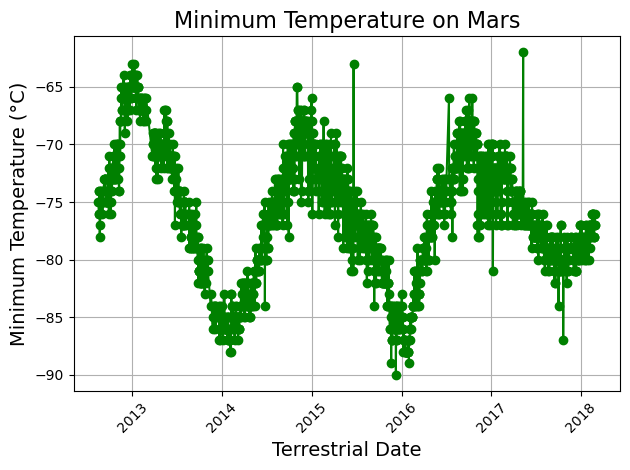

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature over time
 
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'], marker='o', linestyle='-', color='green')

# Add titles and labels
plt.title('Minimum Temperature on Mars', fontsize=16)
plt.xlabel('Terrestrial Date', fontsize=14)
plt.ylabel('Minimum Temperature (°C)', fontsize=14)
plt.xticks(rotation=45) 
plt.grid()

# Show the plot
plt.tight_layout()  
plt.show()

#### Minimum Temperature

Figuring out the minimum temeperature from the Mars dataset shows important insights on the Martian climate. Based on the graph above spring (months 3 & 4) drop passed -80s going into -90s. Compared to the fall (7-9) it drops below -60 to -70s. 

#### Atmospheric Pressure

The Atomospheric Pressure drops the most during 5 & 6 (May and June) and drops to the pressure levels just under 800. Compared to the other months they stay around 800 or above. The highest pressure is at month 9. 

#### Year Length

From the years 2013 to 2018, the lowest drop in temperature was detected in 2016 reaching the lowest at -90. The highest minimum temperature in the overall years was 2013 above a -65. There are few major instances from 2015 to 2016 where it spiked from -75 to way passed -65. The same instance also occured between 2017 to 2018 where somewhere beginning of the year it spiked from -75 and passed the mark of the 2015-2016 outlier. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_weather_df.to_csv('MARS.csv', index=False, header=True)

In [22]:
browser.quit()